# Analyse Exploratoire des données Open food Facts

# Sommaire


**<a href="#C1">Préparation de l'environnement et importation des données</a>**

**<a href="#C2">  I) Analyse de la répartition empirique des données</a>**
&nbsp;

**<a href="#C3">  II) Analyse globale de la relation entre les variables</a>**
&nbsp;

**<a href="#C4">  III) Analyse en composantes principales : Comprendre les covariations entre les variables du nutriscore</a>**
- Eboulis des valeurs propres
- Axe 1 et 2 de l'ACP
- Axe 1 et 3 de l'ACP
&nbsp;

**<a href="#C5">  IV) Analyse de la relation entre le Grade Nutriscore et les éléments le constituant</a>**
&nbsp;

**<a href="#C6">  V) Analyse du Grade Nutri-score et des groupes de produits</a>**
&nbsp;

**<a href="#C7">  VI) Analyse des Additifs</a>**
- A) Relation entre les Additifs et le Grade Nutris-score
- B) Relation entre les Additifs et les groupes de produit
&nbsp;

**<a href="#C8">  VII) Analyse de l'origine des produits</a>**
- A) Origine des produits et Grade Nutri-Score
- B) Origine des produits et groupes de produits
&nbsp;

**<a href="#C9">  VIII) Analyse de la catégorie Bio</a>**
- A) Produits Bio et Grade Nutri-Score 
- B) Produits Bio et Groupes de produits


***

# <a name="C1"> Préparation de l'environnement et importation des données</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'B:\OpenClassRooms\Data_Scientist\Projet_3\fr.openfoodfacts.org.products_clean.csv',sep='\t',low_memory=False)

In [3]:
df=df.sort_values('nutriscore_grade2')

In [4]:
# Création d'un array contenant les couleurs du Nutri-score
colors = ["#1e8449", "#94da4a",'#fcd120','#fc8e33','#f93004']

customPalette = sns.set_palette(sns.color_palette(colors))

# <a name="C2"> I) Analyse de la répartition empirique des données</a>

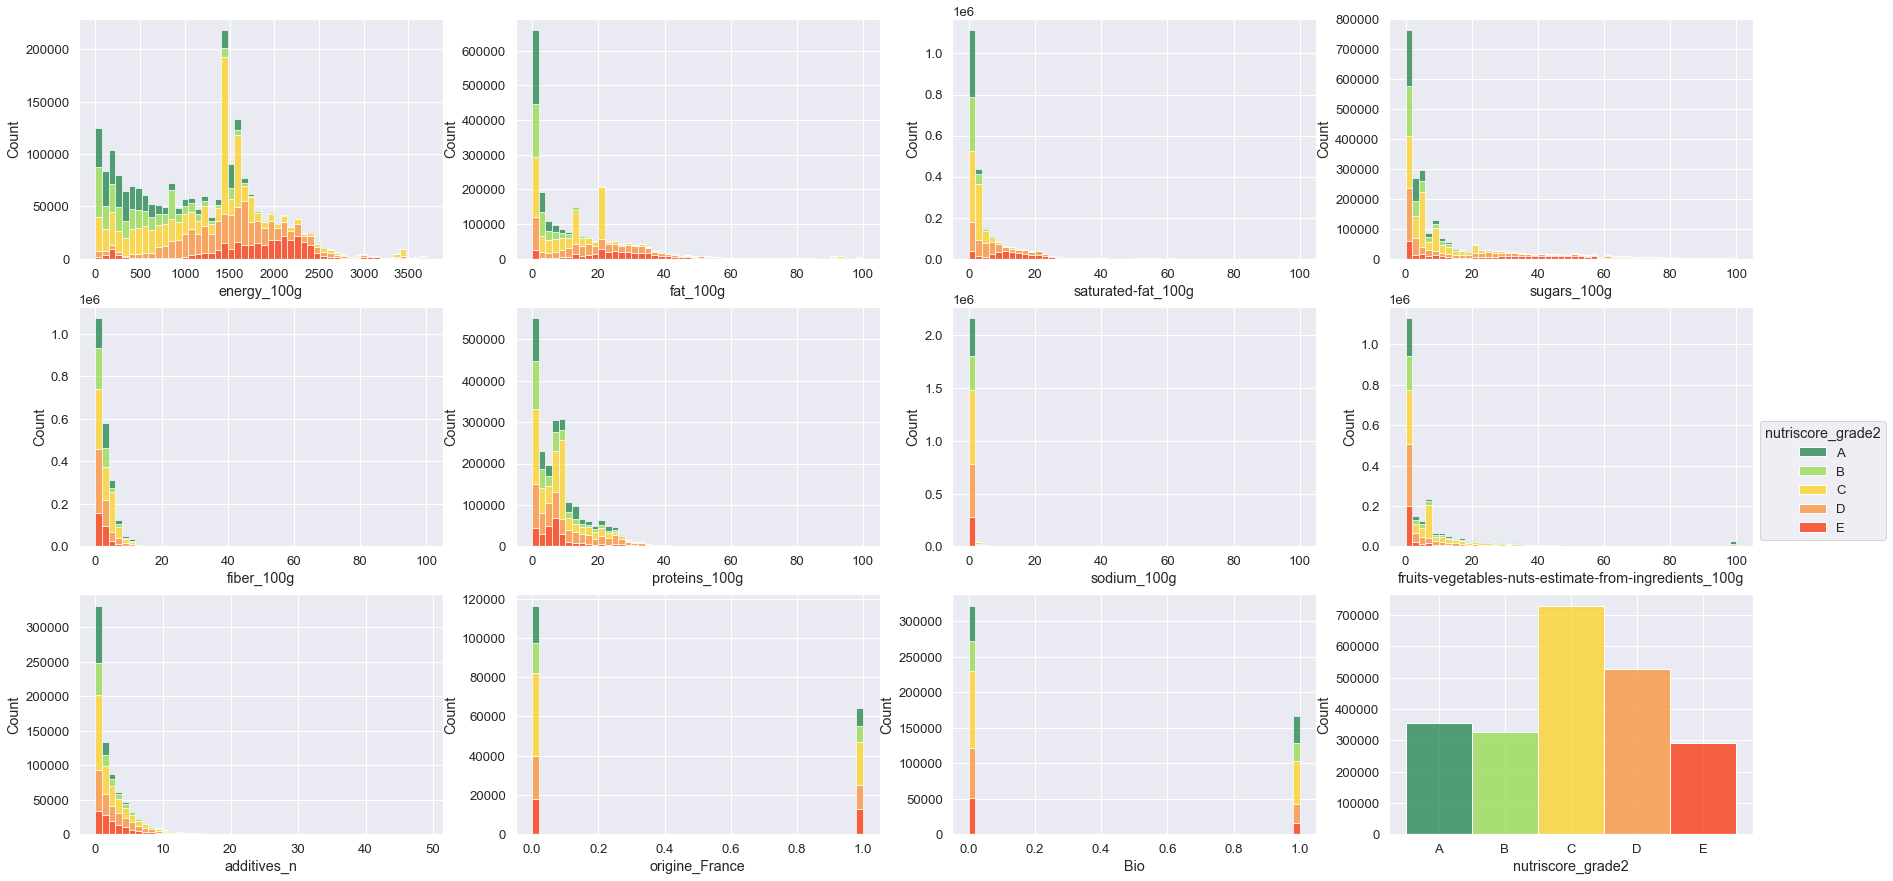

In [5]:
sns.set(font_scale=1.2)

lst_Columns = ['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g','additives_n','origine_France', 'Bio', 'nutriscore_grade2']

n=len(lst_Columns)

plt.figure(figsize=(30,15))

for i in range(n-1):
    col = lst_Columns[i]
    ax = plt.subplot(3, 4, i + 1)
    sns.histplot(data=df, x=col,bins=50,hue='nutriscore_grade2', multiple="stack",legend=False, palette = colors)

    
#Le dernier graphe n'est pas dans la boucle afin de pouvoir contrôler la légende de la figure
col = lst_Columns[n-1]
ax = plt.subplot(3, 4, n)
sns.histplot(data=df, x=col,bins=50,hue='nutriscore_grade2',multiple="stack", palette = colors)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.75))


In [6]:
df[lst_Columns].describe()

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,additives_n,origine_France,Bio
count,2.232783e+06,2.232783e+06,2.232783e+06,2.232783e+06,2.232783e+06,2.232783e+06,2.232783e+06,2.232783e+06,777254.000000,180928.000000,487889.000000
mean,1.149170e+03,1.361796e+01,4.557801e+00,1.225434e+01,3.058227e+00,8.787017e+00,5.623295e-01,8.656148e+00,2.007915,0.356274,0.340383
std,7.448649e+02,1.574242e+01,7.003594e+00,1.817689e+01,4.475336e+00,9.617221e+00,1.864308e+00,1.668989e+01,2.872989,0.478899,0.473838
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,4.730000e+02,1.180000e+00,1.000000e-01,8.849558e-01,5.555556e-01,2.000000e+00,5.200000e-02,0.000000e+00,0.000000,0.000000,0.000000
50%,1.212000e+03,9.200000e+00,2.000000e+00,4.900000e+00,2.100000e+00,7.060000e+00,3.333333e-01,1.816239e+00,1.000000,0.000000,0.000000
75%,1.611000e+03,2.113444e+01,5.555556e+00,1.400000e+01,4.100000e+00,1.112222e+01,6.141111e-01,8.911111e+00,3.000000,1.000000,1.000000
max,3.700000e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,49.000000,1.000000,1.000000


# <a name="C3"> II) Analyse globale de la relation entre les variables</a>

c:\Users\ClementD\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


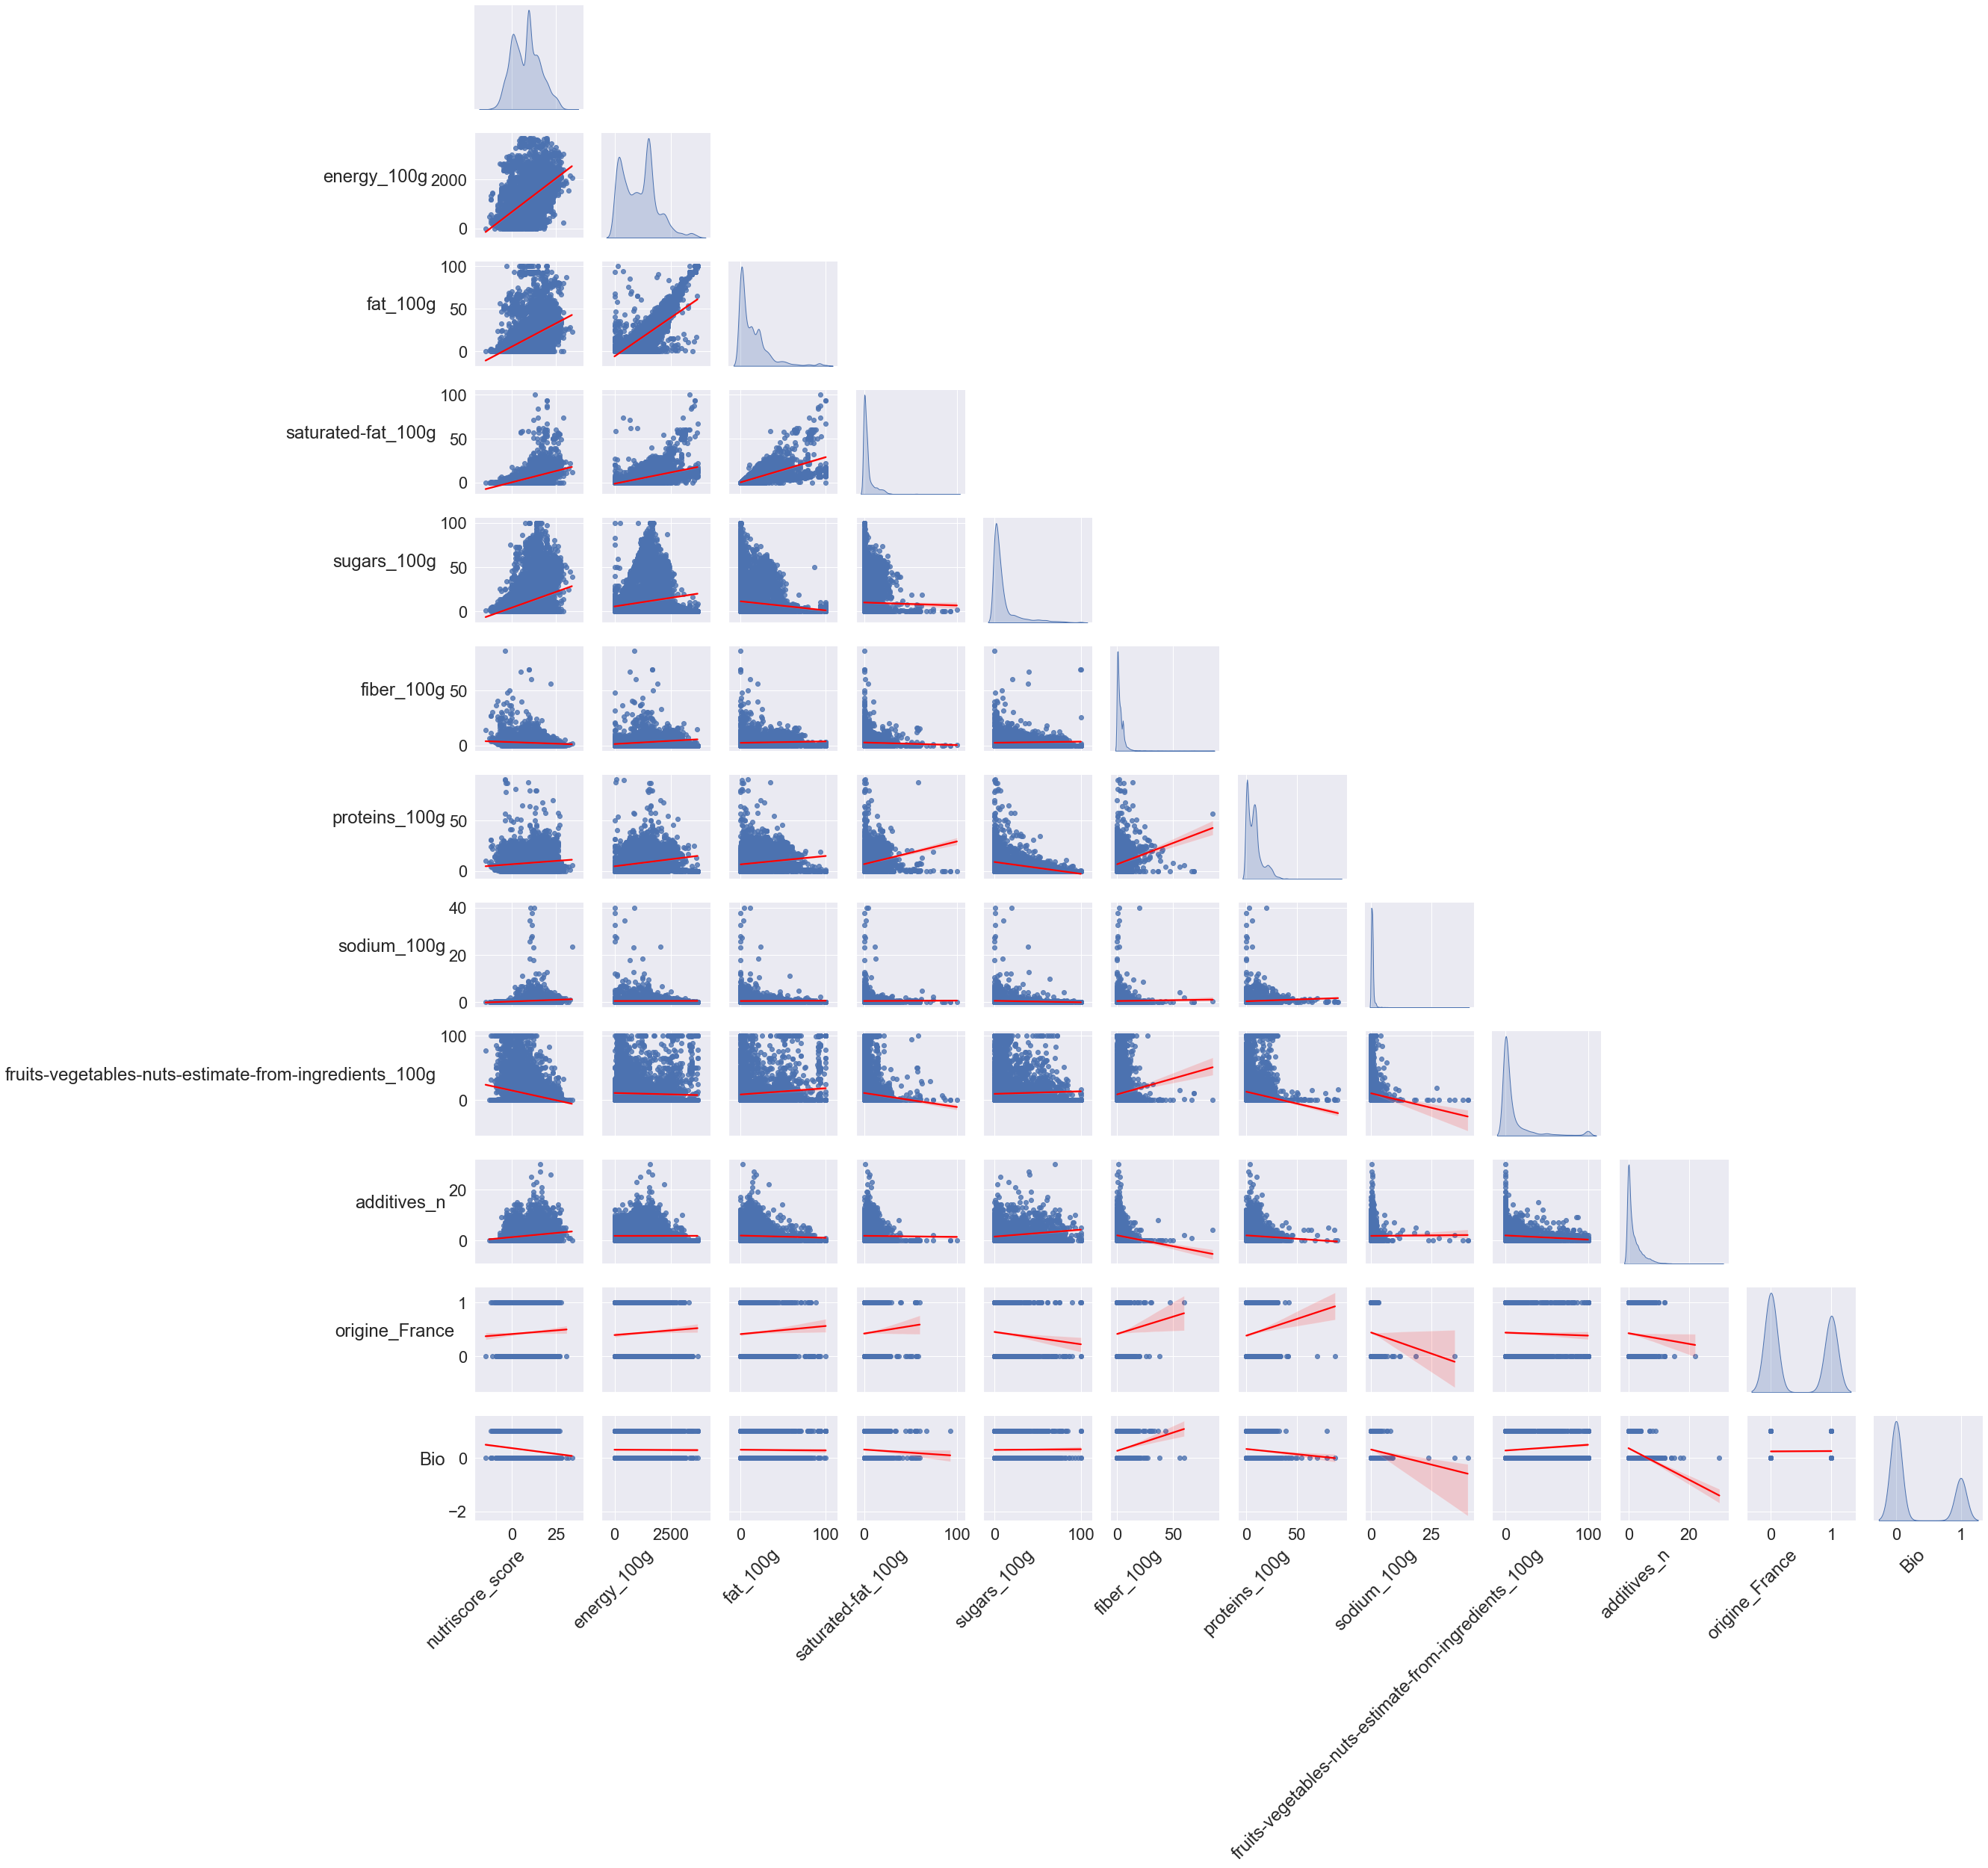

In [7]:
df_light = df.groupby('pnns_groups_1',as_index = False,group_keys=False).apply(lambda s: s.sample(1000,random_state=0))
df_light=df_light.sort_values('nutriscore_grade2')

sns.set(font_scale=2)
g = sns.pairplot(df_light.drop(columns='Unnamed: 0'), corner=True,kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}},palette=colors)

g.tight_layout()

for ax in g.axes.flatten():
    if ax:
        # rotate x axis labels
        ax.set_xlabel(ax.get_xlabel(), rotation = 45)
        # rotate y axis labels
        ax.set_ylabel(ax.get_ylabel(), rotation = 0)
        # set y labels alignment
        ax.yaxis.get_label().set_horizontalalignment('right')
        # set x labels alignment
        ax.xaxis.get_label().set_horizontalalignment('right')

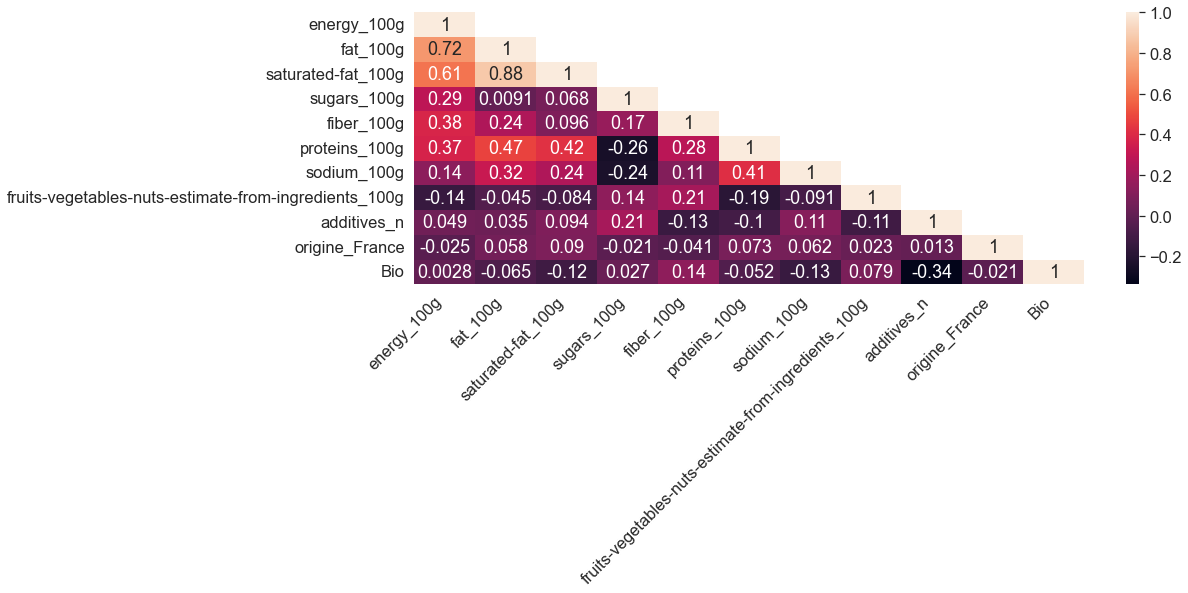

In [8]:
# Mesure du coeficient de corrélation (Spearman rank correlation) entre les variables. 


corr = df[lst_Columns].corr(method='spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

plt.rcParams["figure.figsize"] = (15,5)

sns.set(font_scale=1.5,style='white')
hm = sns.heatmap(corr, annot = True,mask=mask)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right')
hm.set(xlabel=None,ylabel=None)
plt.show()

# <a name="C4"> III) Analyse en composantes principales : Comprendre les covariations entre les variables du nutriscore</a>

In [9]:
# Préparation des données : 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lst_Columns = ['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']
       
       
# Préparation des colonnes constituant le nutriscore et standardisation des données
X = df[lst_Columns].copy()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Préparation de l'ACP
model = PCA(n_components=len(lst_Columns))

# Transformation des données par l'ACP
X_reduced = model.fit_transform(X)



In [10]:
model.explained_variance_ratio_

array([0.30447951, 0.16600789, 0.13549443, 0.12426972, 0.12110035,
       0.08052387, 0.05130645, 0.01681778])

#### Eboulis des valeurs propres

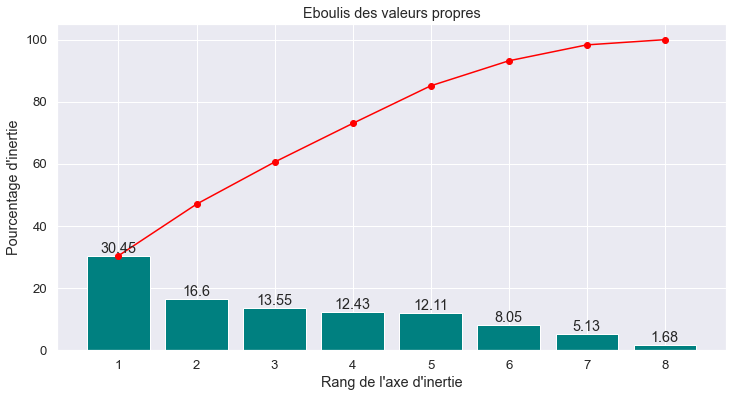

In [11]:
# Représentation des éboulis des valeurs propres afin de voir le pourcentage d'inertie ( variance expliquée) des différents axes de l'ACP
x_list = range(1, len(lst_Columns)+1)
list(x_list)

sns.set(font_scale=1.2)

fig, ax = plt.subplots(figsize=(12,6))

bars = ax.bar(x_list, (model.explained_variance_ratio_*100).round(2),color='teal')
plt.plot(x_list, np.cumsum(model.explained_variance_ratio_)*100,c="red",marker='o')

ax.bar_label(bars)
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

In [12]:
# Selon la méthode du coude : detection d'une chute du pourcentage d'inertie visuellement > les 5 premiers axes sont les plus importants
# Selon le critère de Kayser : les axes majeurs sont ceux qui expliquent plus de (100/ nb variable ) 12,5 % de l'inertie > Ici les axes 1 à 3

In [13]:
# Fonction de représentation graphique des Cercles des corrélations
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Affichage du titre du graphique
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [14]:
# Réinjection des axes de l'ACP dans le jeu de données de base

n_components = 5
for i in range(0, n_components):
    df['PC' + str(i + 1)] = X_reduced[:, i]


In [15]:
# Création d'un jeu de donnée plus petit, prenant 2000 produits aléatoirements pour chaque groupe de produits
df_light = df.groupby('pnns_groups_1',as_index = False,group_keys=False).apply(lambda s: s.sample(2000,random_state=0))

# tri des données par Grade Nutriscore (pour les représentations graphiques)
df_light=df_light.sort_values('nutriscore_grade2')

### Axe 1 et 2 de l'ACP

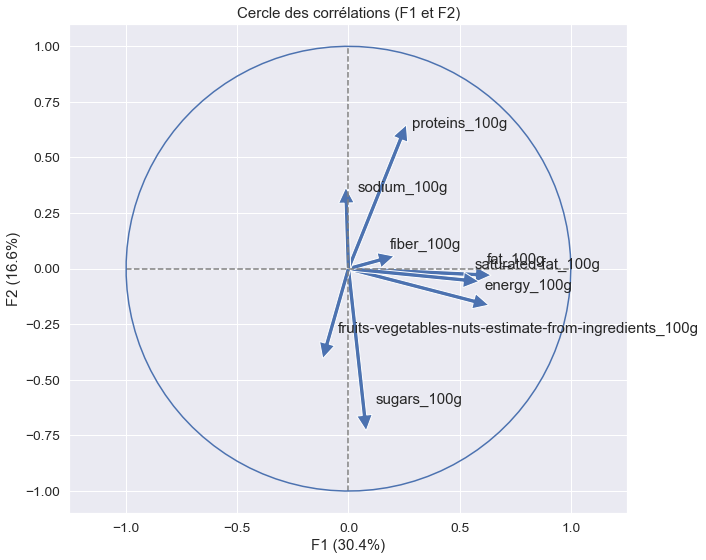

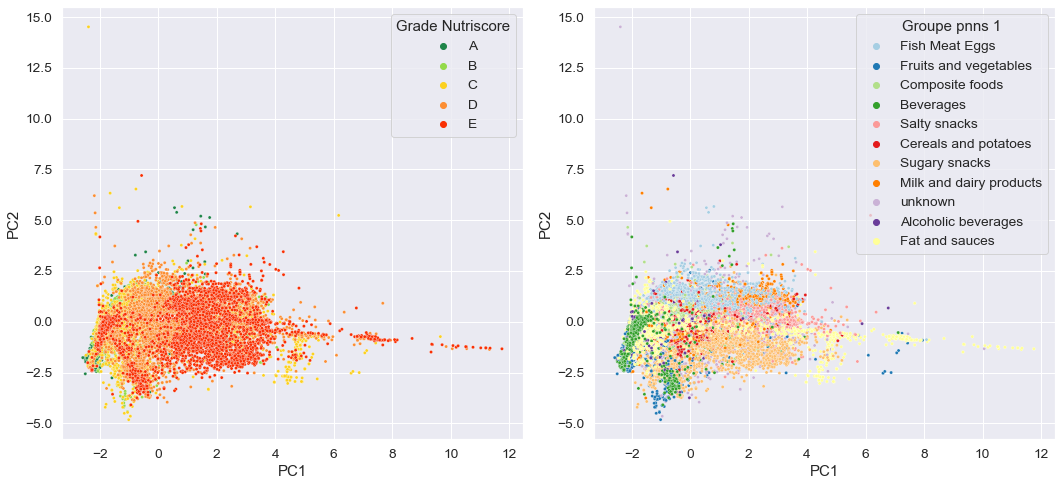

In [16]:
sns.set(font_scale=1.25)

correlation_graph(model, (0,1), lst_Columns)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
sns.scatterplot(data = df_light, x='PC1', y='PC2', hue=df_light['nutriscore_grade2'], alpha = 1, s = 10,palette=colors, ax=axs[0])
axs[0].legend(loc='upper right',
         #bbox_to_anchor=(1, 0.5), 
         ncol=1,title="Grade Nutriscore")

sns.scatterplot(data = df_light, x='PC1', y='PC2', hue=df_light['pnns_groups_1'], alpha = 1, s = 10,palette="Paired", ax=axs[1])
axs[1].legend(loc='upper right',
         #bbox_to_anchor=(1, 0.5), 
         ncol=1,title="Groupe pnns 1")

plt.tight_layout()

plt.show()

### Axe 1 et 3 de l'ACP

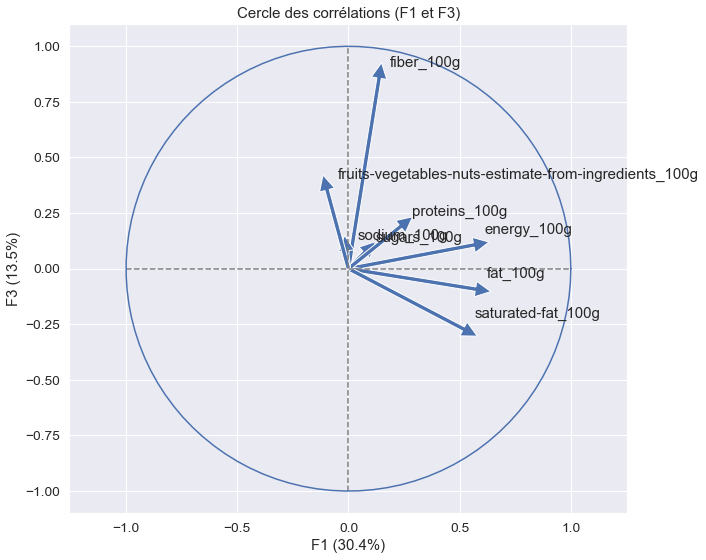

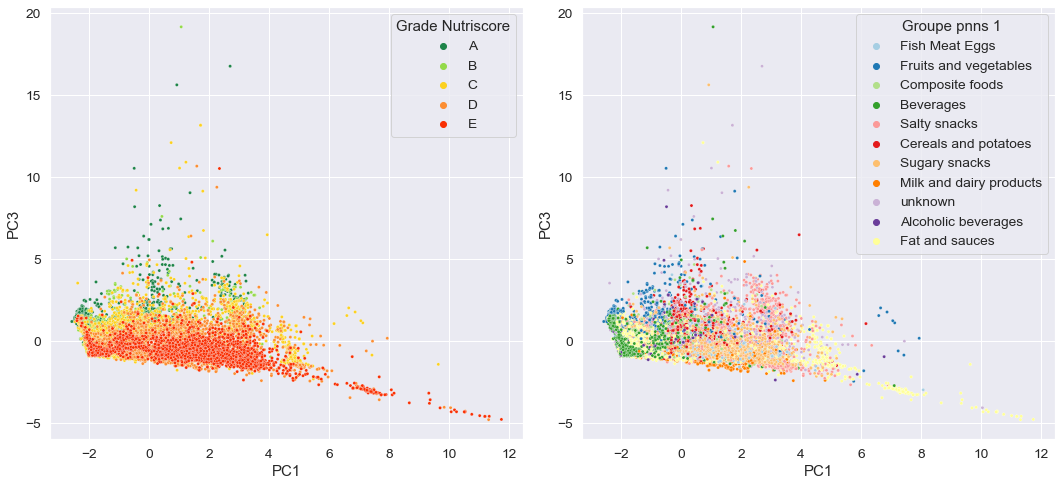

In [17]:
sns.set(font_scale=1.25)

correlation_graph(model, (0,2), lst_Columns)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,7))
sns.scatterplot(data = df_light, x='PC1', y='PC3', hue=df_light['nutriscore_grade2'], alpha = 1, s = 10,palette=colors, ax=axs[0])
axs[0].legend(loc='upper right',
         #bbox_to_anchor=(1, 0.5), 
         ncol=1,title="Grade Nutriscore")

sns.scatterplot(data = df_light, x='PC1', y='PC3', hue=df_light['pnns_groups_1'], alpha = 1, s = 10,palette="Paired", ax=axs[1])
axs[1].legend(loc='upper right',
         #bbox_to_anchor=(1, 0.5), 
         ncol=1,title="Groupe pnns 1")

plt.tight_layout()

plt.show()

# <a name="C5"> IV) Analyse de la relation entre le Grade Nutriscore et les éléments le constituant</a>

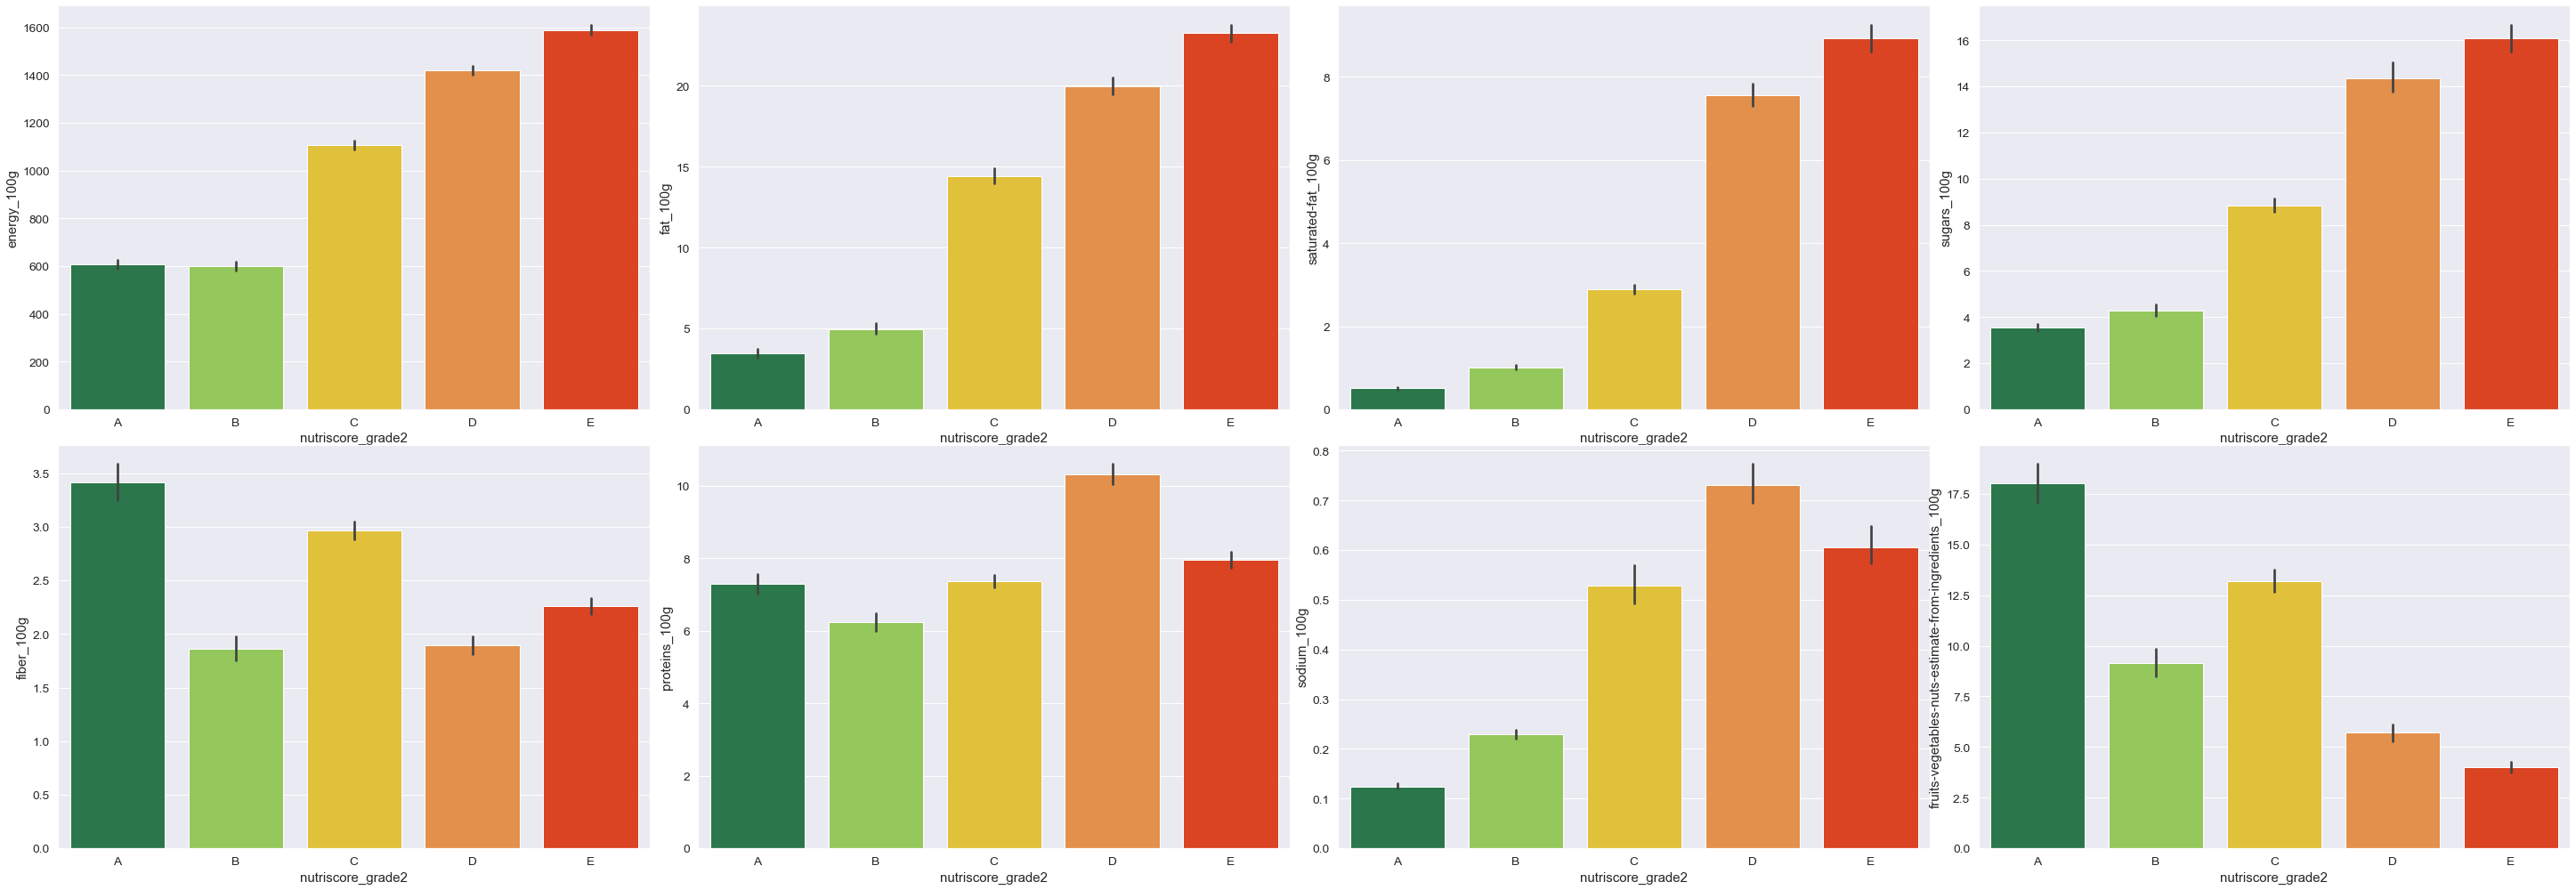

In [18]:
# Réprésentation graphique des différentes variables en fonction du nutriscore
lst_Columns = ['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

n=len(lst_Columns)

plt.figure(figsize=(40,20))

for i in range(n):
    col = lst_Columns[i]
    ax = plt.subplot(3, 4, i + 1)
    sns.barplot(data=df_light, x='nutriscore_grade2',y= col,palette = colors)

plt.tight_layout(pad=0)


#### Analyses statistiques

In [19]:
# Tests statistiques : ANOVA à un facteur
# Variable à expliquer (y) : Liste des variables composant le nutriscore
# Variable explicative (x) : Grade du nutriscore

#Test des conditions d'application de l'ANOVA : 
# Indépendance des produits (individus)
# Les résidus doivent suivrent une loi normal > Test de kolmogorov-smirnov
# La variance de chaque groupe (grade Nutriscore) doit être semblable. > Test de bartlett
import statsmodels.formula.api as smf
import statsmodels.api as sm
from bioinfokit.analys import stat 
import scipy.stats as stats


for columns in lst_Columns: 
    print(f"Test des conditions d'application du modèle : {columns} en fonction du nutriscore")
    model = smf.ols('Q(columns) ~ nutriscore_grade2', data=df_light).fit()
    residues = model.resid_pearson
    print("Test de normalité des résidus par Kolmogorov Smirnov")
    print(stats.kstest(residues, "norm", alternative='two-sided'))
    print('')
    print("Test de l'homoscedasticité (Variances homogènes entre les groupes) : Bartlett")
    res = stat()
    res.bartlett(df=df_light, res_var=columns, xfac_var='nutriscore_grade2')
    print(res.bartlett_summary)
    print('')
    print('*'*20)
    print('')
    

Test des conditions d'application du modèle : energy_100g en fonction du nutriscore
Test de normalité des résidus par Kolmogorov Smirnov
KstestResult(statistic=0.07572758115478434, pvalue=3.602455300066796e-110)

Test de l'homoscedasticité (Variances homogènes entre les groupes) : Bartlett
                 Parameter    Value
0      Test statistics (T)  59.2217
1  Degrees of freedom (Df)   4.0000
2                  p value   0.0000

********************

Test des conditions d'application du modèle : fat_100g en fonction du nutriscore
Test de normalité des résidus par Kolmogorov Smirnov
KstestResult(statistic=0.1706420768429031, pvalue=0.0)

Test de l'homoscedasticité (Variances homogènes entre les groupes) : Bartlett
                 Parameter     Value
0      Test statistics (T)  171.1037
1  Degrees of freedom (Df)    4.0000
2                  p value    0.0000

********************

Test des conditions d'application du modèle : saturated-fat_100g en fonction du nutriscore
Test de norm

In [20]:
#Les conditions d'applications ne sont remplies pour aucune des variables
#Equivalent non paramétrique de l'ANOVA : Test de kruskall Wallis
#Puis comparaison post-hoc entre les groupes (non paramétrique : test de Dunn)

import scikit_posthocs as sp

data=[]

lst_Columns = ['energy_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

for columns in lst_Columns :
    data = [df.loc[Nutriscore, columns].values for Nutriscore in df.groupby('nutriscore_grade2').groups.values()]
    print(f'test de Kruskall Wallis entre la variable {columns} et le Nutriscore Grade')
    print(stats.kruskal(*data))
    print('')
    print('Test post_hoc (non param) de comparaison de moyenne')
    print(sp.posthoc_dunn(df, val_col=columns, group_col='nutriscore_grade2', p_adjust = 'holm'))
    print('')
    print('*'*50)
    print('')

test de Kruskall Wallis entre la variable energy_100g et le Nutriscore Grade
KruskalResult(statistic=715811.9784668796, pvalue=0.0)

Test post_hoc (non param) de comparaison de moyenne
              A             B    C    D    E
A  1.000000e+00  8.198393e-61  0.0  0.0  0.0
B  8.198393e-61  1.000000e+00  0.0  0.0  0.0
C  0.000000e+00  0.000000e+00  1.0  0.0  0.0
D  0.000000e+00  0.000000e+00  0.0  1.0  0.0
E  0.000000e+00  0.000000e+00  0.0  0.0  1.0

**************************************************

test de Kruskall Wallis entre la variable fat_100g et le Nutriscore Grade
KruskalResult(statistic=657743.3060143474, pvalue=0.0)

Test post_hoc (non param) de comparaison de moyenne
     A    B    C    D    E
A  1.0  0.0  0.0  0.0  0.0
B  0.0  1.0  0.0  0.0  0.0
C  0.0  0.0  1.0  0.0  0.0
D  0.0  0.0  0.0  1.0  0.0
E  0.0  0.0  0.0  0.0  1.0

**************************************************

test de Kruskall Wallis entre la variable saturated-fat_100g et le Nutriscore Grade
KruskalResu

# <a name="C6"> V) Analyse du Grade Nutri-score et des groupes de produits</a>

In [21]:
#Pour les prochains graphes relatifs aux groupes de produits, l'ordre des groupes sera fixe (et basé sur le nombre d'additifs)
order = df[['pnns_groups_2','additives_n']].groupby('pnns_groups_2').mean('additives_n').reset_index().sort_values('additives_n')


In [22]:
# Création d'un jeu de données comportant la somme des produits pour chaque groupe de produit et Nutri-Score, puis le pourcentage associée.
Nutri_perc2=pd.crosstab(index=df['pnns_groups_2'], columns=df['nutriscore_grade2'])
Nutri_perc2=pd.melt(Nutri_perc2.reset_index(), id_vars='pnns_groups_2', value_vars=['A','B','C','D','E'])
Nutri_perc2['perc'] = Nutri_perc2.groupby('pnns_groups_2')['value'].apply(lambda x: x*100/x.sum()).round(2)
Nutri_perc2['pnns_groups_2'] = pd.Categorical(Nutri_perc2['pnns_groups_2'], list(order.pnns_groups_2))
print(Nutri_perc2)


                        pnns_groups_2 nutriscore_grade2   value   perc
0                 Alcoholic beverages                 A    1084   6.06
1                          Appetizers                 A     279   2.03
2    Artificially sweetened beverages                 A     495   4.50
3                  Biscuits and cakes                 A     805   1.15
4                               Bread                 A    5395  21.36
..                                ...               ...     ...    ...
195  Teas and herbal teas and coffees                 E     563  30.29
196             Unsweetened beverages                 E    5556  44.99
197                        Vegetables                 E     100   0.29
198        Waters and flavored waters                 E     168   2.13
199                           unknown                 E  141721   9.97

[200 rows x 4 columns]


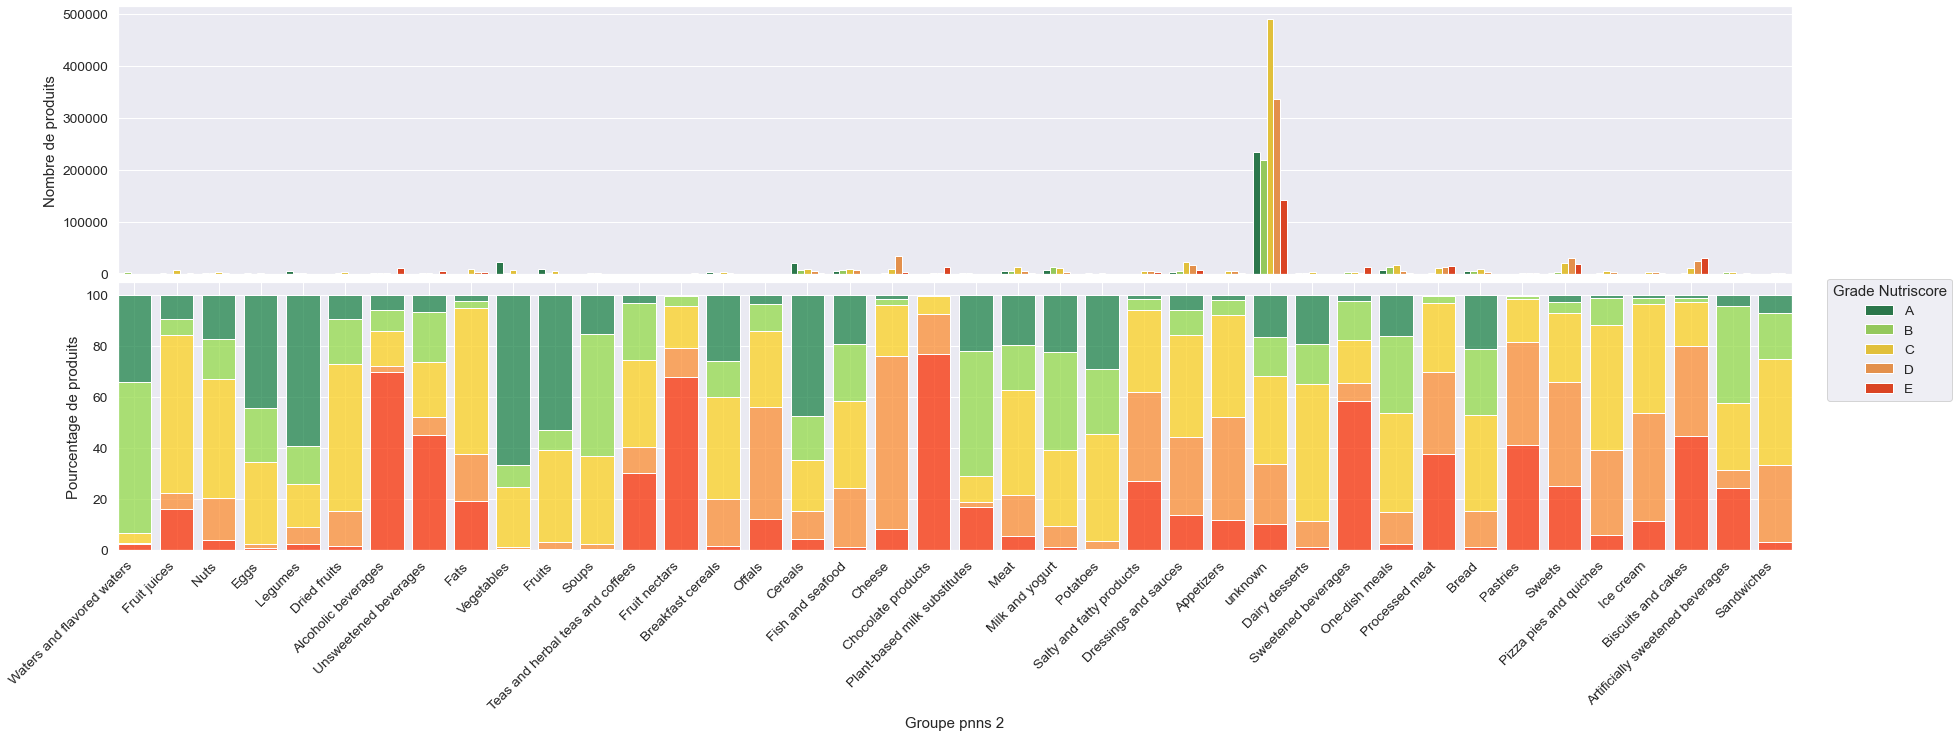

In [23]:
fig, axs = plt.subplots(ncols=1,nrows = 2, sharex=True,figsize=(30,10) )
sns.countplot(x="pnns_groups_2", hue="nutriscore_grade2", data=df,ax=axs[0],palette=colors,order = order['pnns_groups_2']
              )
axs[0].margins(x=0)
axs[0].set(xlabel=None)
axs[0].legend([],[], frameon=False)
axs[0].set(ylabel='Nombre de produits')

sns.histplot(Nutri_perc2, 
             x='pnns_groups_2', hue='nutriscore_grade2', weights='perc', multiple='stack',
             shrink=.8,ax=axs[1],palette=colors
             )
axs[1].margins(x=0)

axs[0].legend(loc='lower right',
         bbox_to_anchor=(1.1, -0.5), 
         ncol=1,title="Grade Nutriscore")

axs[1].legend([],[], frameon=False)


plt.xticks(rotation=45,ha='right')

plt.subplots_adjust(hspace = 0.03)

# Set x-axis label
plt.xlabel('Groupe pnns 2')
# Set y-axis label
plt.ylabel("Pourcentage de produits")
plt.show()

In [24]:
pd.crosstab(index=df['nutriscore_grade2'], columns=df['pnns_groups_2'])


pnns_groups_2,Alcoholic beverages,Appetizers,Artificially sweetened beverages,Biscuits and cakes,Bread,Breakfast cereals,Cereals,Cheese,Chocolate products,Dairy desserts,...,Salty and fatty products,Sandwiches,Soups,Sweetened beverages,Sweets,Teas and herbal teas and coffees,Unsweetened beverages,Vegetables,Waters and flavored waters,unknown
nutriscore_grade2,,,,,,,,,,,,,,,,,,,,,
A,1084,279,495,805,5395,3013,21958,795,13,1490,...,229,320,489,553,1980,57,831,22930,2701,234942
B,1464,802,4170,1282,6472,1631,7927,1237,35,1208,...,684,784,1525,3803,3413,421,2438,2848,4686,218525
C,2412,5510,2915,11832,9557,4585,9158,10096,1253,4128,...,4956,1825,1101,4215,20515,635,2645,8061,289,489856
D,458,5541,774,24684,3504,2121,5152,34281,2657,768,...,5426,1339,63,1715,30755,183,879,343,58,336209
E,12467,1600,2653,31194,326,184,1953,4147,13023,93,...,4148,127,12,14430,18833,563,5556,100,168,141721


#### Analyses statistiques

In [25]:
from scipy.stats import chi2_contingency

#H0 : Les effectifs sont répartis équitablement : Les deux variables (Grade Nutri-Score - Groupes de produits) sont indépendantes
#H1 : Les effectifs ne sont pas répartis équitablement : Les deux variables (Grade Nutri - Score-Groupes de produits) ne sont pas indépendantes

# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(pd.crosstab(index=df['nutriscore_grade2'], columns=df['pnns_groups_2'])) 

#print('Table des valeurs attendues')
#print(expected)
print("")
print(f"Valeur de la statistique : {c}")
print(f"Degrés de liberté : {dof}")
print(f"p-value : {p}")
print("")

print(f"P-value = {p}, inférieure au seuil de décision de 5% (proba de rejeter à tord l'hypothèse nulle), on rejette H0, les deux variables ne sont pas indépendantes. La proportion de Grade Nutri-Score est différente entre les groupes de produits ")


Valeur de la statistique : 678746.7118432063
Degrés de liberté : 156
p-value : 0.0

P-value = 0.0, inférieure au seuil de décision de 5% (proba de rejeter à tord l'hypothèse nulle), on rejette H0, les deux variables ne sont pas indépendantes. La proportion de Grade Nutri-Score est différente entre les groupes de produits 


# <a name="C7"> VI) Analyse des Additifs</a>

## A) Relation entre les Additifs et le Grade Nutris-score

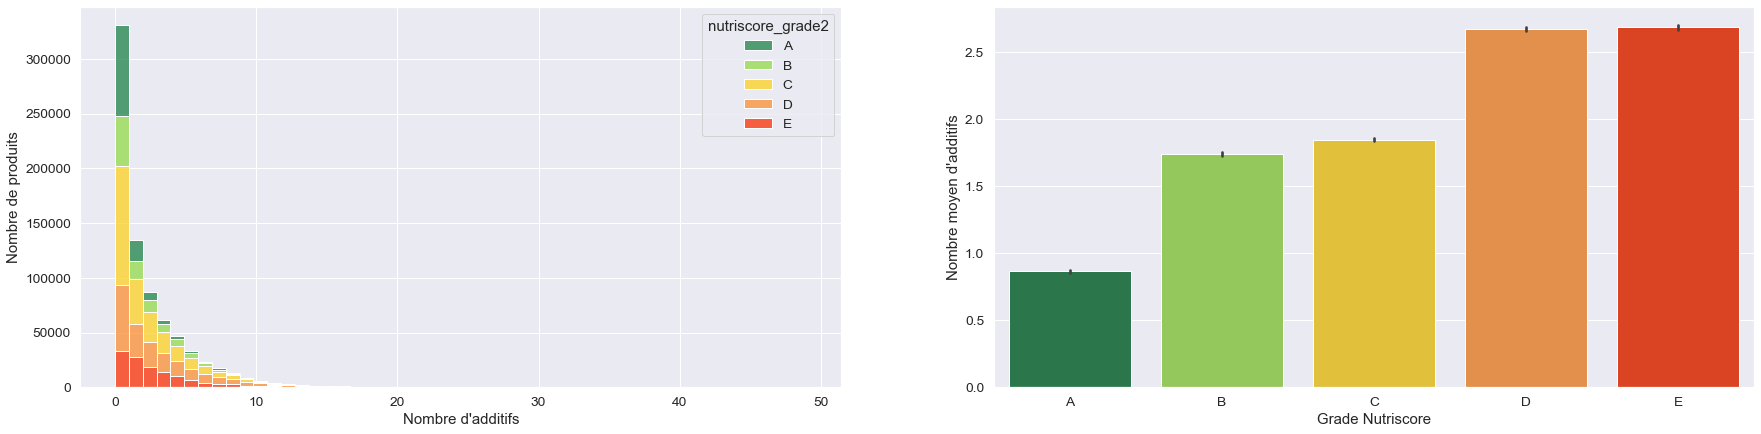

In [26]:
fig, axs = plt.subplots(ncols=2,figsize=(30,7))
sns.histplot(data=df, x='additives_n', bins=50,hue='nutriscore_grade2',multiple="stack", palette = colors,ax=axs[0])

#sns.countplot(x="nutriscore_grade2", hue="origine_France", data=df,ax=axs[0])
#axs[0].legend([],[], frameon=False)
axs[0].set(xlabel="Nombre d'additifs", ylabel='Nombre de produits')


sns.barplot(data=df, x='nutriscore_grade2',y= 'additives_n',palette = colors,ax=axs[1])
axs[1].set(xlabel="Grade Nutriscore", ylabel="Nombre moyen d'additifs")


plt.show()


In [27]:
df[['nutriscore_grade2','additives_n']].groupby('nutriscore_grade2').mean('additives_n').reset_index().sort_values('additives_n').round(2)

,nutriscore_grade2,additives_n
0,A,0.87
1,B,1.74
2,C,1.84
3,D,2.67
4,E,2.68


#### Analyses statistiques

In [28]:
# Le nombre d'additifs est une donnée de comptage, suivant une loi de Poisson et non une loi Normal.
# Pour réaliser un modèle linéaire (généralisé) testant l'effet du groupe, il faut donc changer la famille de la loi utilisée.
# Le critère de validation de l'effet est basé sur le Critère d'Akaike (AIC) qui doit etre inférieur à celui du modèle nul.  

model_add_nutri = smf.glm('additives_n ~ nutriscore_grade2', data = df, family=sm.families.Poisson()).fit()
print(model_add_nutri.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            additives_n   No. Observations:               777254
Model:                            GLM   Df Residuals:                   777249
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8896e+06
Date:                Thu, 22 Sep 2022   Deviance:                   2.5003e+06
Time:                        10:11:22   Pearson chi2:                 3.02e+06
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1985
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [29]:
model_add_groupe_0 = smf.glm('additives_n ~ 1', data = df, family=sm.families.Poisson()).fit()
print(model_add_groupe_0.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            additives_n   No. Observations:               777254
Model:                            GLM   Df Residuals:                   777253
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.9756e+06
Date:                Thu, 22 Sep 2022   Deviance:                   2.6723e+06
Time:                        10:11:24   Pearson chi2:                 3.20e+06
No. Iterations:                     5   Pseudo R-squ. (CS):         -6.661e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6971      0.001    870.858      0.0

In [30]:
print('AIC du modèle :')
print("modèle nul =",model_add_groupe_0.aic)
print("modèle Nutriscore Grade2  =",model_add_nutri.aic)

AIC du modèle :
modèle nul = 3951255.464257973
modèle Nutriscore Grade2  = 3779254.9933254733


In [31]:
# Comparaison 2 à 2 
sp.posthoc_dunn(df, val_col='additives_n', group_col='nutriscore_grade2', p_adjust = 'holm').round(4)

,A,B,C,D,E
A,1.0,0.0000,0.0000,0.0,0.0
B,0.0,1.0000,0.0002,0.0,0.0
C,0.0,0.0002,1.0000,0.0,0.0
D,0.0,0.0000,0.0000,1.0,0.0
E,0.0,0.0000,0.0000,0.0,1.0


## B) Relation entre les Additifs et les groupes de produit

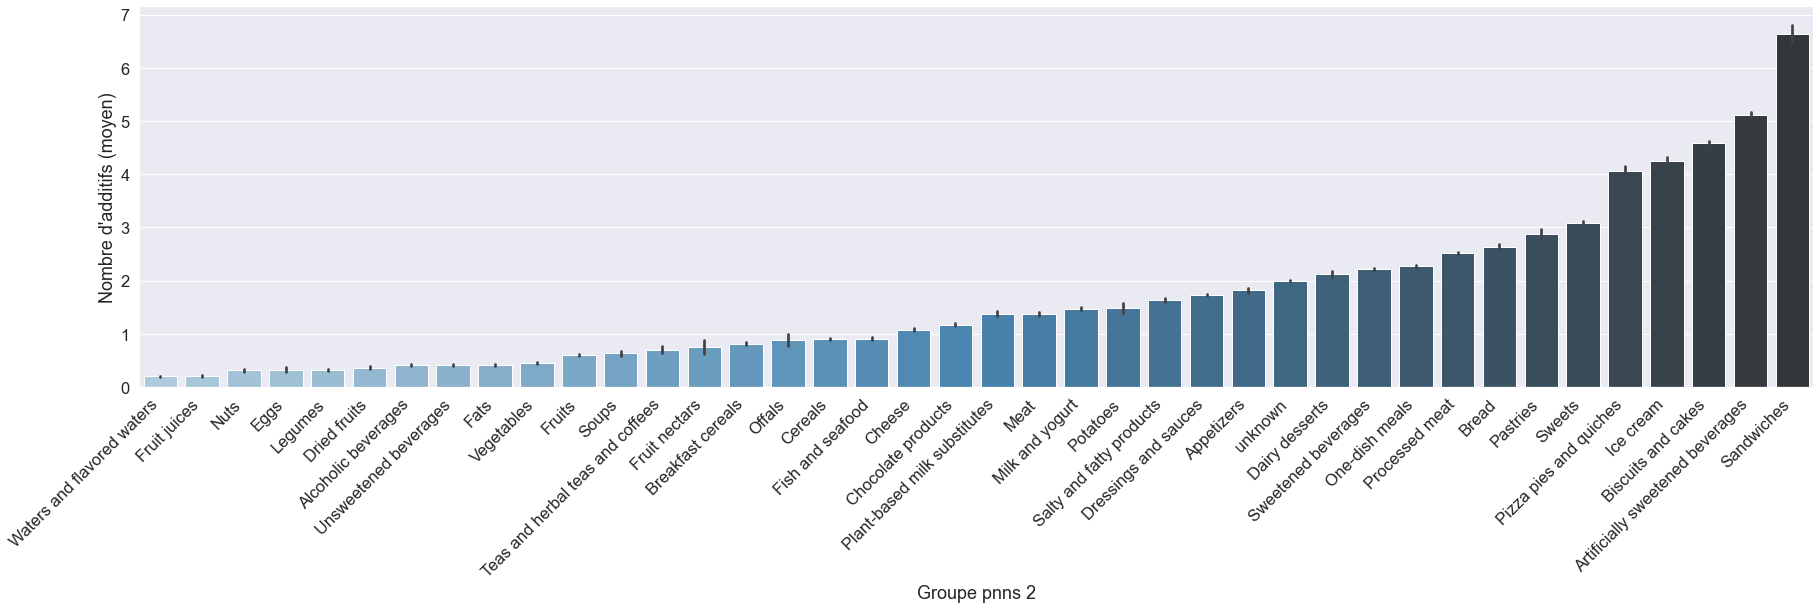

In [32]:

sns.set(font_scale=1.5)
plt.figure(figsize=(30,7))


sns.barplot(data=df,
            x='pnns_groups_2',
            y= 'additives_n',
            order = order['pnns_groups_2'],
            palette="Blues_d")

plt.xticks(rotation=45,ha='right')

# Set x-axis label
plt.xlabel('Groupe pnns 2')
# Set y-axis label
plt.ylabel("Nombre d'additifs (moyen)")

plt.show()

In [33]:
df[['pnns_groups_2','additives_n']].groupby('pnns_groups_2').mean('additives_n').reset_index().sort_values('additives_n').round(2)

,pnns_groups_2,additives_n
38,Waters and flavored waters,0.20
15,Fruit juices,0.21
22,Nuts,0.31
12,Eggs,0.32
19,Legumes,0.33
11,Dried fruits,0.37
0,Alcoholic beverages,0.41
36,Unsweetened beverages,0.41
13,Fats,0.42
37,Vegetables,0.45


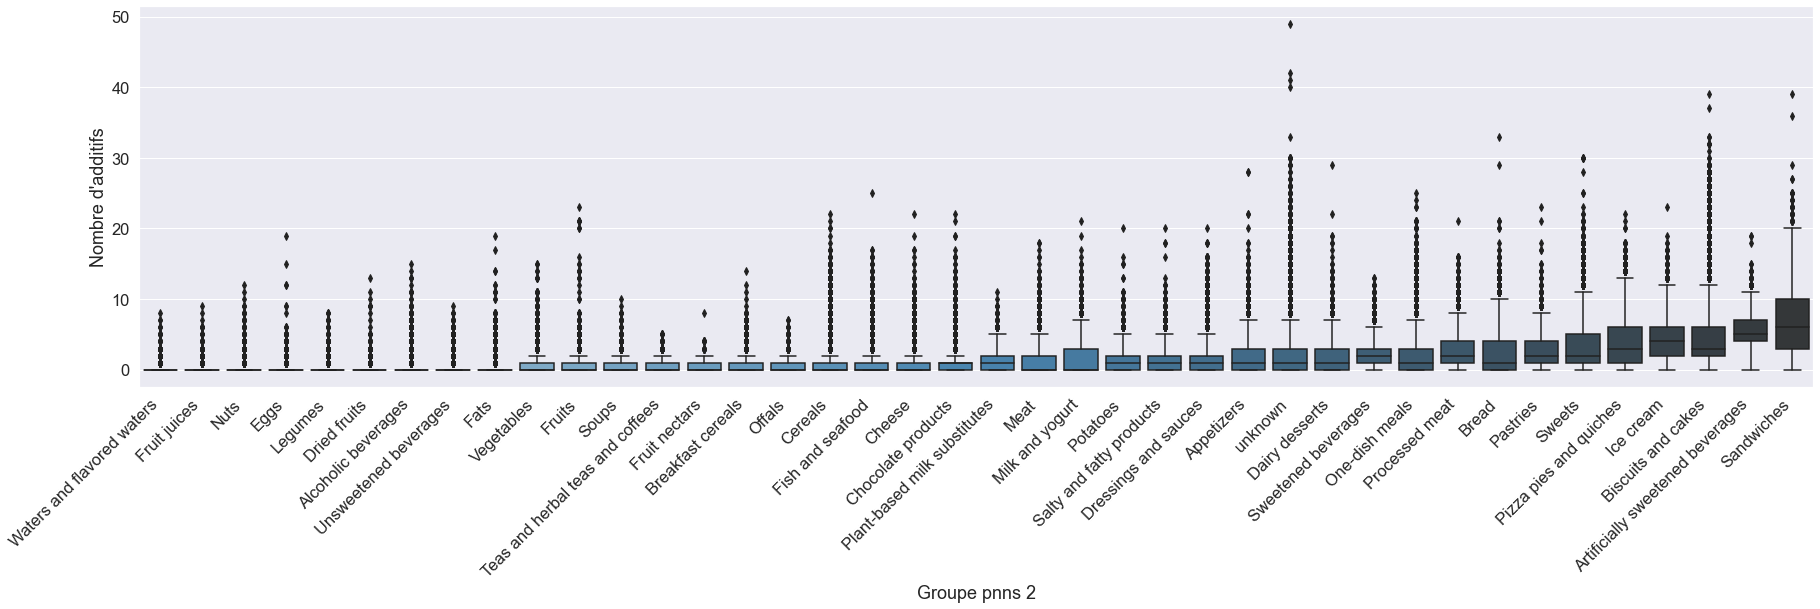

In [34]:
sns.set(font_scale=1.5)
plt.figure(figsize=(30,7))


sns.boxplot(data=df,
            x='pnns_groups_2',
            y= 'additives_n',
            order = order['pnns_groups_2'],
            palette="Blues_d")

plt.xticks(rotation=45,ha='right')

# Set x-axis label
plt.xlabel('Groupe pnns 2')
# Set y-axis label
plt.ylabel("Nombre d'additifs")

plt.show()

### Analyses statistiques

In [35]:
model_add_groupe = smf.glm('additives_n ~ pnns_groups_2', data = df, family=sm.families.Poisson()).fit()
print(model_add_groupe.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            additives_n   No. Observations:               777254
Model:                            GLM   Df Residuals:                   777214
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7301e+06
Date:                Thu, 22 Sep 2022   Deviance:                   2.1812e+06
Time:                        10:12:05   Pearson chi2:                 2.58e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4684
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [36]:

print('AIC du modèle :')
print("modèle nul =",model_add_groupe_0.aic.round(1))
print("modèle PNNS groupe 2  =",model_add_groupe.aic.round(1))


AIC du modèle :
modèle nul = 3951255.5
modèle PNNS groupe 2  = 3460218.0


# <a name="C8"> VII) Analyse de l'origine des produits</a>

## A) Origine des produits et Grade Nutri-Score

In [37]:
pd.crosstab(index=df['nutriscore_grade2'], columns=df['origine_France'])

origine_France,0.0,1.0
nutriscore_grade2,,
A,18834,9412
B,15507,7986
C,42165,21827
D,22245,12496
E,17717,12739


In [38]:
Origin_perc=pd.crosstab(index=df['nutriscore_grade2'], columns=df['origine_France'])
Origin_perc=pd.melt(Origin_perc.reset_index(), id_vars='nutriscore_grade2', value_vars=[0.0, 1.0])
Origin_perc['perc'] = Origin_perc.groupby('nutriscore_grade2')['value'].apply(lambda x: x*100/x.sum()).round(2)
print(Origin_perc)


  nutriscore_grade2 origine_France  value   perc
0                 A            0.0  18834  66.68
1                 B            0.0  15507  66.01
2                 C            0.0  42165  65.89
3                 D            0.0  22245  64.03
4                 E            0.0  17717  58.17
5                 A            1.0   9412  33.32
6                 B            1.0   7986  33.99
7                 C            1.0  21827  34.11
8                 D            1.0  12496  35.97
9                 E            1.0  12739  41.83


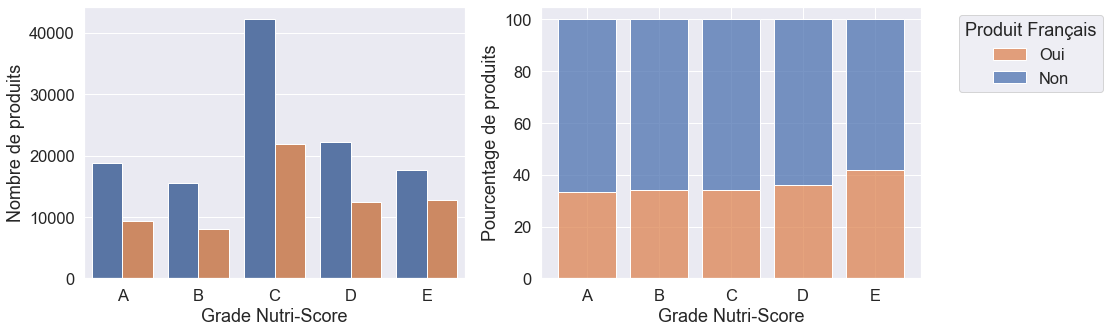

In [39]:
fig, axs = plt.subplots(ncols=2)
sns.countplot(x="nutriscore_grade2", hue="origine_France", data=df,ax=axs[0])
axs[0].legend([],[], frameon=False)
axs[0].set(xlabel='Grade Nutri-Score', ylabel='Nombre de produits')

sns.histplot(Origin_perc, x='nutriscore_grade2', hue='origine_France', weights='perc', multiple='stack',shrink=.8,ax=axs[1])
axs[1].legend(loc='upper right',
         bbox_to_anchor=(1.5,1), 
         ncol=1,title="Produit Français",labels=['Oui', 'Non'])
axs[1].set(xlabel='Grade Nutri-Score', ylabel='Pourcentage de produits')

plt.show()


### Analyses statistiques

In [40]:
from scipy.stats import chi2_contingency

#H0 : Les effectifs sont répartis équitablement : Les deux variables (Origine - Grade Nutri-score) sont indépendantes
#H1 : Les effectifs ne sont pas répartis équitablement : Les deux variables (Origine - Grade Nutri-score) ne sont pas indépendantes

# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(pd.crosstab(index=df['nutriscore_grade2'], columns=df['origine_France'])) 

print('Table des valeurs attendues')
print(expected)
print("")
print(f"Valeur de la statistique : {c.round(2)}")
print(f"Degrés de liberté : {dof}")
print(f"p-value : {p.round(4)}")
print("")

print(f"P-value = {p.round(4)}, inférieure au seuil de décision de 5% (proba de rejeter à tord l'hypothèse nulle), on rejette H0, les deux variables ne sont pas indépendantes. La proportion de produit d'origine France est différente entre les Grades de nutriscore ")

Table des valeurs attendues
[[18182.67558366 10063.32441634]
 [15123.04742218  8369.95257782]
 [41193.29377432 22798.70622568]
 [22363.67388132 12377.32611868]
 [19605.30933852 10850.69066148]]

Valeur de la statistique : 669.44
Degrés de liberté : 4
p-value : 0.0

P-value = 0.0, inférieure au seuil de décision de 5% (proba de rejeter à tord l'hypothèse nulle), on rejette H0, les deux variables ne sont pas indépendantes. La proportion de produit d'origine France est différente entre les Grades de nutriscore 


## B) Origine des produits et groupes de produits

In [41]:
Origin_perc2=pd.crosstab(index=df['pnns_groups_2'], columns=df['origine_France'])
Origin_perc2=pd.melt(Origin_perc2.reset_index(), id_vars='pnns_groups_2', value_vars=[0.0, 1.0])
Origin_perc2['perc'] = Origin_perc2.groupby('pnns_groups_2')['value'].apply(lambda x: x*100/x.sum()).round(2)

print(Origin_perc2)


                       pnns_groups_2 origine_France  value   perc
0                Alcoholic beverages            0.0   3164  37.08
1                         Appetizers            0.0   1842  62.00
2   Artificially sweetened beverages            0.0   1130  89.47
3                 Biscuits and cakes            0.0   6413  60.67
4                              Bread            0.0   2826  72.15
..                               ...            ...    ...    ...
75  Teas and herbal teas and coffees            1.0     43  23.37
76             Unsweetened beverages            1.0    496  32.10
77                        Vegetables            1.0   2655  34.06
78        Waters and flavored waters            1.0    337  21.56
79                           unknown            1.0   5820  18.84

[80 rows x 4 columns]


In [42]:
# Tri des groupes de produits dans l'ordre déterminé précédemment
Origin_perc2['pnns_groups_2'] = pd.Categorical(Origin_perc2['pnns_groups_2'], list(order.pnns_groups_2))

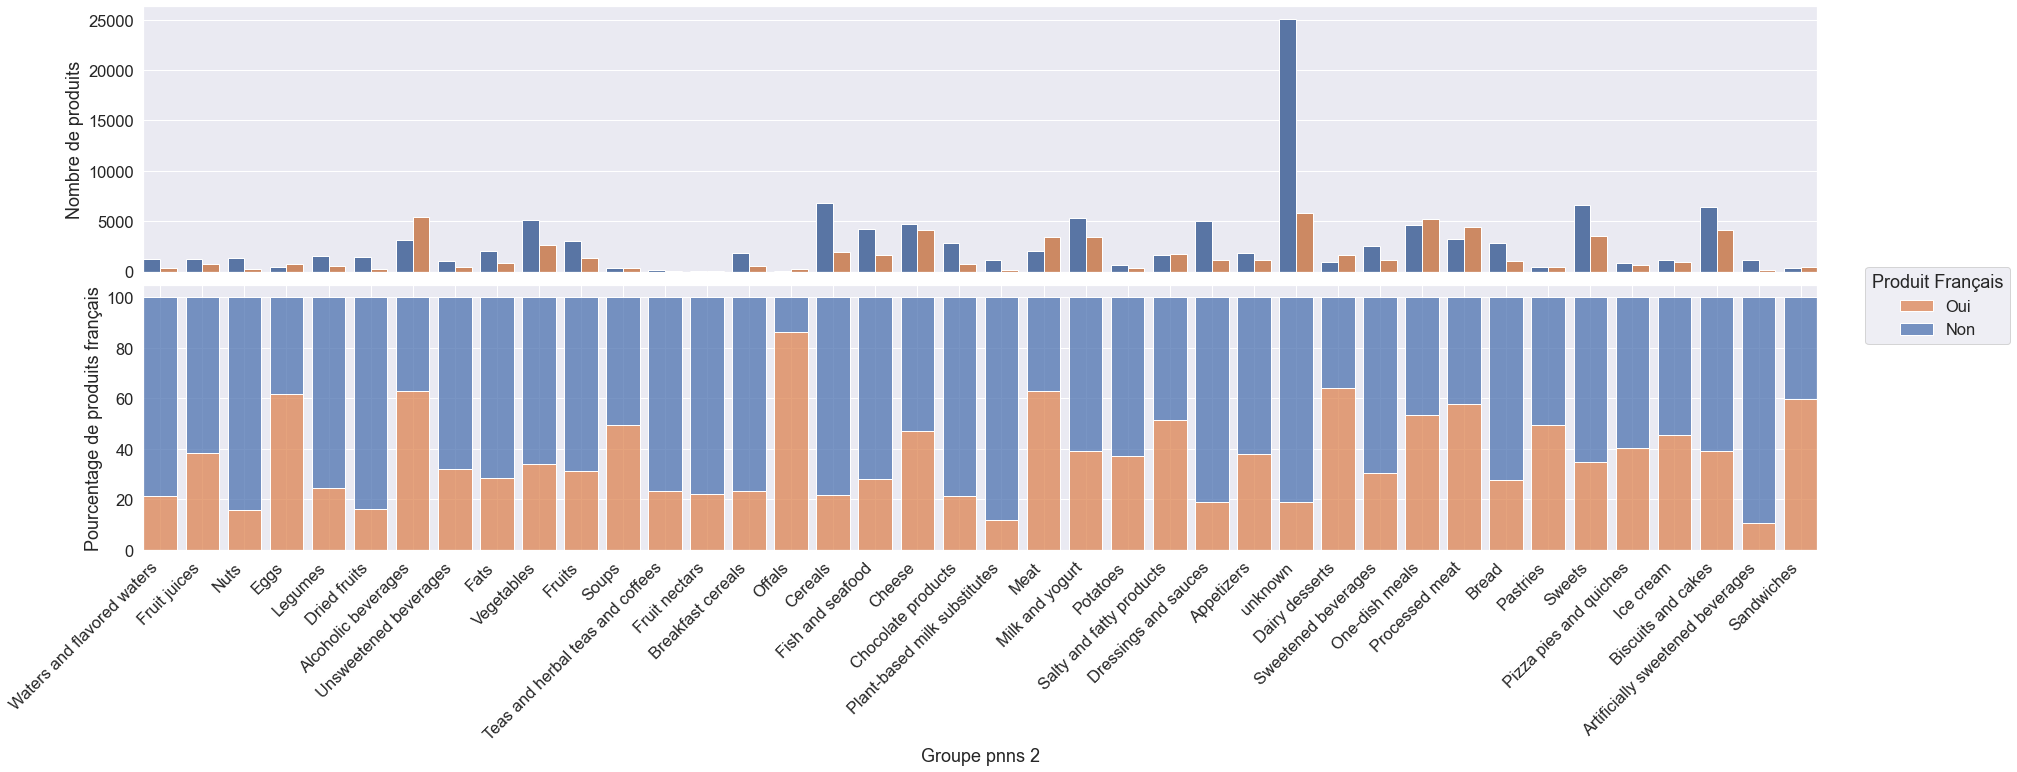

In [43]:
fig, axs = plt.subplots(ncols=1,nrows = 2, sharex=True,figsize=(30,10) )
sns.countplot(x="pnns_groups_2", hue="origine_France", data=df,ax=axs[0],order = order['pnns_groups_2'])
axs[0].margins(x=0)
axs[0].set(xlabel=None)
axs[0].legend([],[], frameon=False)
axs[0].set(ylabel='Nombre de produits')

sns.histplot(Origin_perc2, 
             x='pnns_groups_2', hue='origine_France', weights='perc', multiple='stack',
             shrink=.8,ax=axs[1]
             )
axs[1].margins(x=0)


axs[1].legend(loc='upper right',
         bbox_to_anchor=(1.12,1.1), 
         ncol=1,title="Produit Français",labels=['Oui', 'Non']
         )


plt.xticks(rotation=45,ha='right')

plt.subplots_adjust(hspace = 0.05)

# Set x-axis label
plt.xlabel('Groupe pnns 2')
# Set y-axis label
plt.ylabel("Pourcentage de produits français")
plt.show()

#### Analyses statistiques

In [44]:
#H0 : Les effectifs sont répartis équitablement : Les deux variables (Origine - Grade Nutri-score) sont indépendantes
#H1 : Les effectifs ne sont pas répartis équitablement : Les deux variables (Origine - Grade Nutri-score) ne sont pas indépendantes

# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(pd.crosstab(index=df['pnns_groups_2'], columns=df['origine_France'])) 


print(f"Valeur de la statistique : {c.round(2)}")
print(f"Degrés de liberté : {dof}")
print(f"p-value : {p.round(4)}")
print("")

print(f"P-value = {p.round(4)}, inférieure au seuil de décision de 5% (proba de rejeter à tord l'hypothèse nulle), on rejette H0, les deux variables ne sont pas indépendantes. La proportion de produits d'origine France est différente entre les groupes de produits ")

Valeur de la statistique : 18221.43
Degrés de liberté : 39
p-value : 0.0

P-value = 0.0, inférieure au seuil de décision de 5% (proba de rejeter à tord l'hypothèse nulle), on rejette H0, les deux variables ne sont pas indépendantes. La proportion de produits d'origine France est différente entre les groupes de produits 


# <a name="C9"> VIII) Analyse de la catégorie Bio</a>

## A) Produits Bio et Grade Nutri-Score

In [45]:
Bio_perc=pd.crosstab(index=df['nutriscore_grade2'], columns=df['Bio'])
Bio_perc=pd.melt(Bio_perc.reset_index(), id_vars='nutriscore_grade2', value_vars=[0.0, 1.0])
Bio_perc['perc'] = Bio_perc.groupby('nutriscore_grade2')['value'].apply(lambda x: x*100/x.sum()).round(2)
print(Bio_perc)


  nutriscore_grade2  Bio   value   perc
0                 A  0.0   49417  56.83
1                 B  0.0   42645  62.97
2                 C  0.0  108104  63.80
3                 D  0.0   71325  72.70
4                 E  0.0   50329  76.64
5                 A  1.0   37533  43.17
6                 B  1.0   25074  37.03
7                 C  1.0   61336  36.20
8                 D  1.0   26783  27.30
9                 E  1.0   15343  23.36


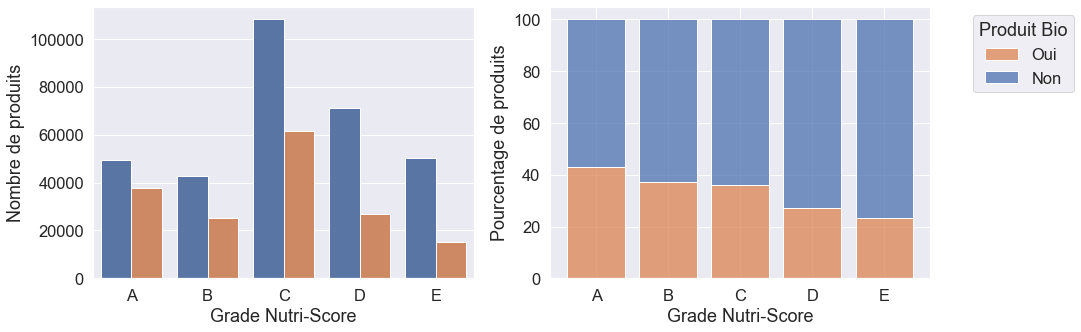

In [46]:
fig, axs = plt.subplots(ncols=2)
sns.countplot(x="nutriscore_grade2", hue="Bio", data=df,ax=axs[0])
axs[0].legend([],[], frameon=False)
axs[0].set(xlabel='Grade Nutri-Score', ylabel='Nombre de produits')

sns.histplot(Bio_perc, x='nutriscore_grade2', hue='Bio', weights='perc', multiple='stack',shrink=.8,ax=axs[1])

axs[1].legend(loc='upper right',
         bbox_to_anchor=(1.4,1), 
         ncol=1,title="Produit Bio",labels=['Oui', 'Non'])
axs[1].set(xlabel='Grade Nutri-Score', ylabel='Pourcentage de produits')

plt.show()

#### Analyses statistiques

In [47]:
from scipy.stats import chi2_contingency

#H0 : Les effectifs sont répartis équitablement : Les deux variables (Bio-nutriscore grade) sont indépendantes
#H1 : Les effectifs ne sont pas répartis équitablement : Les deux variables (Bio-nutriscore grade) ne sont pas indépendantes

# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(pd.crosstab(index=df['nutriscore_grade2'], columns=df['Bio'])) 
# Print the p-value


print(f"Valeur de la statistique : {c.round(2)}")
print(f"Degrés de liberté : {dof}")
print(f"p-value : {p.round(4)}")
print("")

print(f"P-value = {p.round(4)}, inférieure au seuil de décision de 5% (proba de rejeter à tord l'hypothèse nulle), on rejette H0, les deux variables ne sont pas indépendantes. La proportion de produits Bio est différente entre les Grades de Nutri-score ")



Valeur de la statistique : 9165.98
Degrés de liberté : 4
p-value : 0.0

P-value = 0.0, inférieure au seuil de décision de 5% (proba de rejeter à tord l'hypothèse nulle), on rejette H0, les deux variables ne sont pas indépendantes. La proportion de produits Bio est différente entre les Grades de Nutri-score 


## B) Produits Bio et Groupes de produits

In [48]:
Bio_perc2=pd.crosstab(index=df['pnns_groups_2'], columns=df['Bio'])
Bio_perc2=pd.melt(Bio_perc2.reset_index(), id_vars='pnns_groups_2', value_vars=[0.0, 1.0])
Bio_perc2['perc'] = Bio_perc2.groupby('pnns_groups_2')['value'].apply(lambda x: x*100/x.sum()).round(2)
print(Bio_perc2)

                       pnns_groups_2  Bio  value   perc
0                Alcoholic beverages  0.0   4997  76.63
1                         Appetizers  0.0   4441  80.86
2   Artificially sweetened beverages  0.0   2244  95.13
3                 Biscuits and cakes  0.0  16067  76.97
4                              Bread  0.0   5120  68.09
..                               ...  ...    ...    ...
75  Teas and herbal teas and coffees  1.0    341  55.00
76             Unsweetened beverages  1.0   2798  63.87
77                        Vegetables  1.0   3908  37.66
78        Waters and flavored waters  1.0     85   7.87
79                           unknown  1.0  82495  37.76

[80 rows x 4 columns]


In [49]:
# Tri des groupes de produits dans l'ordre déterminé précédemment

Bio_perc2['pnns_groups_2'] = pd.Categorical(Bio_perc2['pnns_groups_2'], list(order.pnns_groups_2))

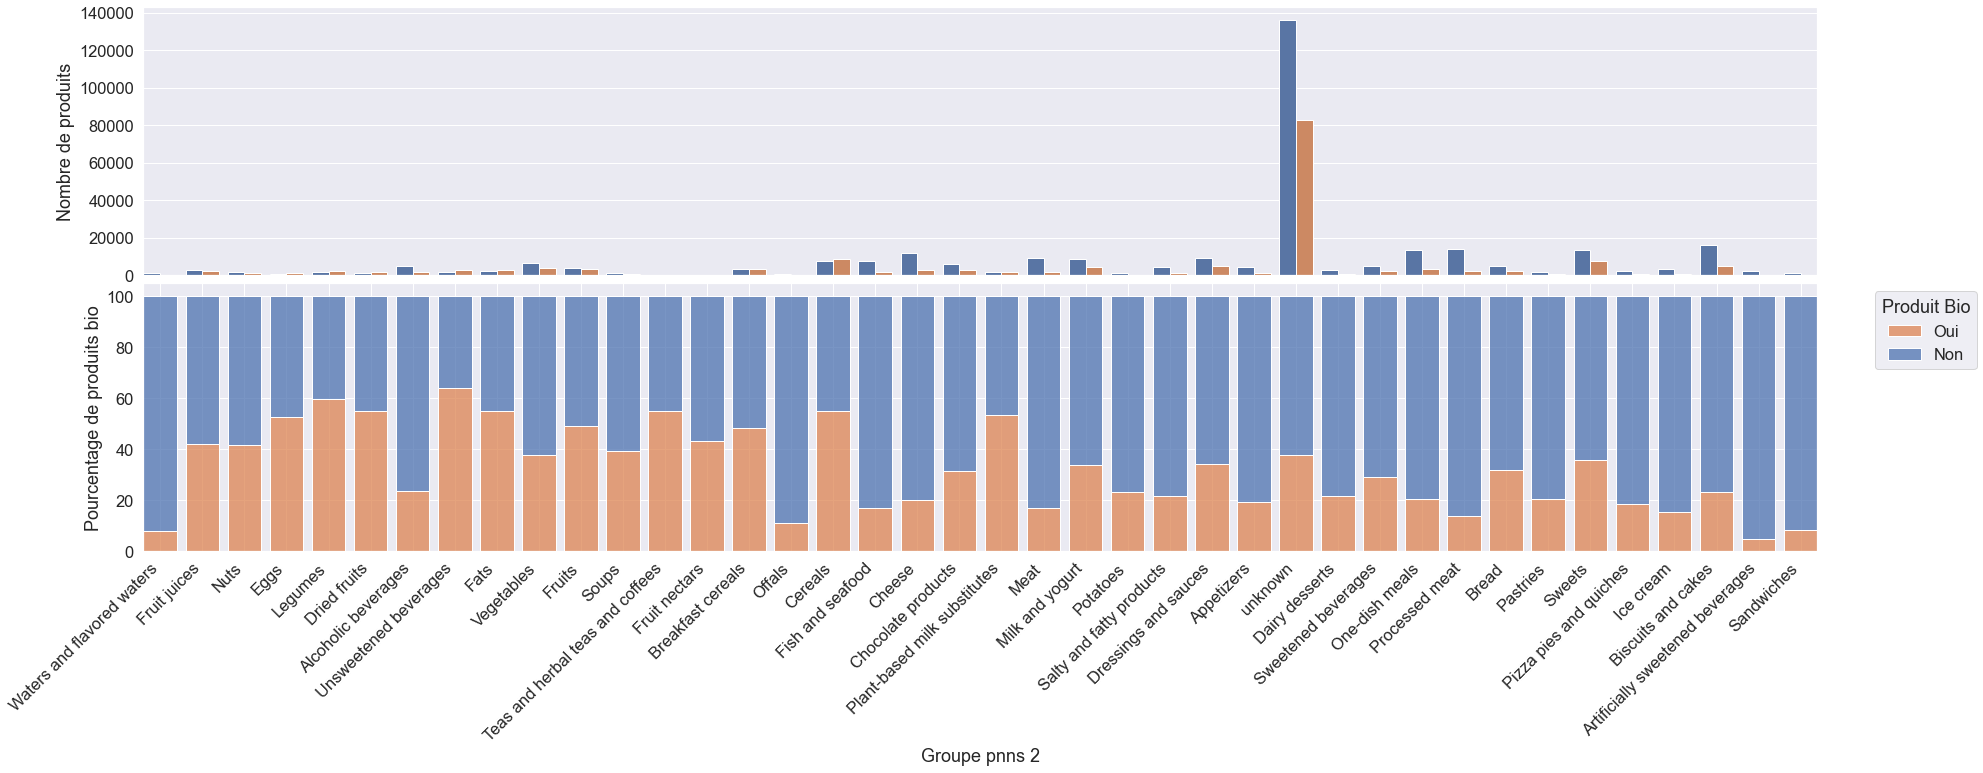

In [50]:
fig, axs = plt.subplots(ncols=1,nrows = 2, sharex=True,figsize=(30,10) )
sns.countplot(x="pnns_groups_2", hue="Bio", data=df,ax=axs[0],order = order['pnns_groups_2'])
axs[0].margins(x=0)
axs[0].set(xlabel=None)
axs[0].legend([],[], frameon=False)
axs[0].set(ylabel='Nombre de produits')

sns.histplot(Bio_perc2, 
             x='pnns_groups_2', hue='Bio', weights='perc', multiple='stack',
             shrink=.8,ax=axs[1]
             )
axs[1].margins(x=0)


axs[1].legend(loc='upper right',
         bbox_to_anchor=(1.1,1), 
         ncol=1,title="Produit Bio",labels=['Oui', 'Non'])


plt.xticks(rotation=45,ha='right')

plt.subplots_adjust(hspace = 0.03)

# Set x-axis label
plt.xlabel('Groupe pnns 2')
# Set y-axis label
plt.ylabel("Pourcentage de produits bio")
plt.show()

### Analyses statistiques

In [51]:

#H0 : Les effectifs sont répartis équitablement : Les deux variables (Bio- Groupes de Produits) sont indépendantes
#H1 : Les effectifs ne sont pas répartis équitablement : Les deux variables (Bio- Groupes de produits) ne sont pas indépendantes

# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(pd.crosstab(index=df['pnns_groups_2'], columns=df['Bio'])) 
# Print the p-value
#print(expected)
print(f"Valeur de la statistique : {c.round(2)}")
print(f"Degrés de liberté : {dof}")
print(f"p-value : {p.round(4)}")
print("")

print(f"P-value = {p.round(4)}, inférieure au seuil de décision de 5% (proba de rejeter à tord l'hypothèse nulle), on rejette H0, les deux variables ne sont pas indépendantes. La proportion de produits Bio est différente entre les groupes de produits ")


Valeur de la statistique : 25416.9
Degrés de liberté : 39
p-value : 0.0

P-value = 0.0, inférieure au seuil de décision de 5% (proba de rejeter à tord l'hypothèse nulle), on rejette H0, les deux variables ne sont pas indépendantes. La proportion de produits Bio est différente entre les groupes de produits 
